In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [78]:
data=pd.read_csv('swiggy_file.csv')

In [79]:
data   #it display the data

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,FLAT DEAL\r\nFLAT ₹125 OFF\r\nUSE FLAT125ABOVE...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\r\nUSE TRYNEWABOVE ₹149, FLAT...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,"50% OFF UPTO ₹100\r\nUSE TRYNEWABOVE ₹129, FLA...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,DEAL OF DAY\r\n10% OFF UPTO ₹40\r\nUSE STEALDE...,Circular Road,No,Abohar
...,...,...,...,...,...,...,...,...,...,...
140652,Yummy Momo'S Cafe,"Chinese, Fast Food",4.6,3 ratings,₹100 for two,3,"20% OFF UPTO ₹50\r\nUSE TRYNEWABOVE ₹149, FLAT...",Yavatmal Locality,Yes,Yavatmal
140653,CAFE FIRST FLOOR,"Beverages, Snacks",3.2,3 ratings,₹200 for two,2,"FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500, FLAT ₹...",Yavatmal City,Yes,Yavatmal
140654,Cafe Coffee Aani Barach Kahi,Snacks,3.2,50+ ratings,₹150 for two,2,"FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500, FLAT ₹...",Yavatmal Locality,Yes,Yavatmal
140655,Patil Family Restaurant,"North Indian, Biryani",4.3,9 ratings,₹200 for two,2,"FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500, FLAT ₹...",Yavatmal Locality,No,Yavatmal


In [80]:
data.describe()        # it give the count...etc

,Number of Offers
count,140657.000000
mean,3.187890
std,1.583943
min,0.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [81]:
data.info()       #it give the total entries in col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140657 entries, 0 to 140656
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Restaurant Name    140657 non-null  object
 1   Cuisine            140630 non-null  object
 2   Rating             140657 non-null  object
 3   Number of Ratings  126115 non-null  object
 4   Average Price      140657 non-null  object
 5   Number of Offers   140657 non-null  int64 
 6   Offer Name         138849 non-null  object
 7   Area               140655 non-null  object
 8   Pure Veg           140657 non-null  object
 9   Location           140657 non-null  object
dtypes: int64(1), object(9)
memory usage: 10.7+ MB


In [82]:
datarn=data.dropna(axis=1)        # dropping missing value column wise

In [83]:
datarn

,Restaurant Name,Rating,Average Price,Number of Offers,Pure Veg,Location
0,La Pino'Z Pizza,4.0,₹250 for two,2,No,Abohar
1,The Second Wife,3.6,₹250 for two,2,No,Abohar
2,Tasty Bites,3.8,₹200 for two,1,Yes,Abohar
3,Food Studio,3.5,₹49 for two,5,Yes,Abohar
4,Roll Express,4.3,₹200 for two,2,No,Abohar
...,...,...,...,...,...,...
140652,Yummy Momo'S Cafe,4.6,₹100 for two,3,Yes,Yavatmal
140653,CAFE FIRST FLOOR,3.2,₹200 for two,2,Yes,Yavatmal
140654,Cafe Coffee Aani Barach Kahi,3.2,₹150 for two,2,Yes,Yavatmal
140655,Patil Family Restaurant,4.3,₹200 for two,2,No,Yavatmal


In [84]:
datarn.info()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140657 entries, 0 to 140656
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Restaurant Name   140657 non-null  object
 1   Rating            140657 non-null  object
 2   Average Price     140657 non-null  object
 3   Number of Offers  140657 non-null  int64 
 4   Pure Veg          140657 non-null  object
 5   Location          140657 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.4+ MB


In [85]:
datacrn=data.dropna(axis=0)  # dropping missing value rows wise

In [86]:
datacrn

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,FLAT DEAL\r\nFLAT ₹125 OFF\r\nUSE FLAT125ABOVE...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\r\nUSE TRYNEWABOVE ₹149, FLAT...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,"50% OFF UPTO ₹100\r\nUSE TRYNEWABOVE ₹129, FLA...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,DEAL OF DAY\r\n10% OFF UPTO ₹40\r\nUSE STEALDE...,Circular Road,No,Abohar
...,...,...,...,...,...,...,...,...,...,...
140652,Yummy Momo'S Cafe,"Chinese, Fast Food",4.6,3 ratings,₹100 for two,3,"20% OFF UPTO ₹50\r\nUSE TRYNEWABOVE ₹149, FLAT...",Yavatmal Locality,Yes,Yavatmal
140653,CAFE FIRST FLOOR,"Beverages, Snacks",3.2,3 ratings,₹200 for two,2,"FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500, FLAT ₹...",Yavatmal City,Yes,Yavatmal
140654,Cafe Coffee Aani Barach Kahi,Snacks,3.2,50+ ratings,₹150 for two,2,"FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500, FLAT ₹...",Yavatmal Locality,Yes,Yavatmal
140655,Patil Family Restaurant,"North Indian, Biryani",4.3,9 ratings,₹200 for two,2,"FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500, FLAT ₹...",Yavatmal Locality,No,Yavatmal


In [87]:
datacrn.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 124597 entries, 0 to 140656
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Restaurant Name    124597 non-null  object
 1   Cuisine            124597 non-null  object
 2   Rating             124597 non-null  object
 3   Number of Ratings  124597 non-null  object
 4   Average Price      124597 non-null  object
 5   Number of Offers   124597 non-null  int64 
 6   Offer Name         124597 non-null  object
 7   Area               124597 non-null  object
 8   Pure Veg           124597 non-null  object
 9   Location           124597 non-null  object
dtypes: int64(1), object(9)
memory usage: 10.5+ MB


In [88]:
datafill=data.fillna(999999)

In [89]:
datafill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140657 entries, 0 to 140656
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Restaurant Name    140657 non-null  object
 1   Cuisine            140657 non-null  object
 2   Rating             140657 non-null  object
 3   Number of Ratings  140657 non-null  object
 4   Average Price      140657 non-null  object
 5   Number of Offers   140657 non-null  int64 
 6   Offer Name         140657 non-null  object
 7   Area               140657 non-null  object
 8   Pure Veg           140657 non-null  object
 9   Location           140657 non-null  object
dtypes: int64(1), object(9)
memory usage: 10.7+ MB


In [90]:
data.isnull().sum()

Restaurant Name          0
Cuisine                 27
Rating                   0
Number of Ratings    14542
Average Price            0
Number of Offers         0
Offer Name            1808
Area                     2
Pure Veg                 0
Location                 0
dtype: int64

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140657 entries, 0 to 140656
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Restaurant Name    140657 non-null  object
 1   Cuisine            140630 non-null  object
 2   Rating             140657 non-null  object
 3   Number of Ratings  126115 non-null  object
 4   Average Price      140657 non-null  object
 5   Number of Offers   140657 non-null  int64 
 6   Offer Name         138849 non-null  object
 7   Area               140655 non-null  object
 8   Pure Veg           140657 non-null  object
 9   Location           140657 non-null  object
dtypes: int64(1), object(9)
memory usage: 10.7+ MB


In [92]:
data_split=data

In [93]:
data_split = data.iloc[:15,:]

In [94]:
data_split

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,FLAT DEAL\r\nFLAT ₹125 OFF\r\nUSE FLAT125ABOVE...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\r\nUSE TRYNEWABOVE ₹149, FLAT...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,"50% OFF UPTO ₹100\r\nUSE TRYNEWABOVE ₹129, FLA...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,DEAL OF DAY\r\n10% OFF UPTO ₹40\r\nUSE STEALDE...,Circular Road,No,Abohar
5,Grill Masters,"Italian-American, Fast Food",4.1,100+ ratings,₹250 for two,1,FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500,Circular Road,No,Abohar
6,The Chocolate Room,Indian,3.9,20+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\r\nUSE TRYNEWABOVE ₹149, FLAT...",Central Abohar,Yes,Abohar
7,Snakkers,"Burgers, Pastas",4.2,100+ ratings,₹200 for two,1,FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500,NEAR DAV COLEEGE,No,Abohar
8,Dumpling Hood,Fast Food,NEW,NaN,₹199 for two,1,FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500,Central Abohar,No,Abohar
9,Picado International Food,"Pizzas, Beverages",4.3,100+ ratings,₹300 for two,2,"40% OFF UPTO ₹80\r\nUSE TRYNEWABOVE ₹149, FLAT...",Central Abohar,Yes,Abohar


In [95]:
data_split.isnull().sum()

Restaurant Name      0
Cuisine              0
Rating               0
Number of Ratings    1
Average Price        0
Number of Offers     0
Offer Name           0
Area                 0
Pure Veg             0
Location             0
dtype: int64

In [96]:
data_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Restaurant Name    15 non-null     object
 1   Cuisine            15 non-null     object
 2   Rating             15 non-null     object
 3   Number of Ratings  14 non-null     object
 4   Average Price      15 non-null     object
 5   Number of Offers   15 non-null     int64 
 6   Offer Name         15 non-null     object
 7   Area               15 non-null     object
 8   Pure Veg           15 non-null     object
 9   Location           15 non-null     object
dtypes: int64(1), object(9)
memory usage: 1.3+ KB


In [97]:
cols=['Cuisine','Number of Ratings','Offer Name'] #we create a another group to apply fillna function

In [98]:
data_split[cols]

,Cuisine,Number of Ratings,Offer Name
0,"Pizzas, Pastas",10+ ratings,FLAT DEAL\r\nFLAT ₹125 OFF\r\nUSE FLAT125ABOVE...
1,"Indian, North Indian",50+ ratings,"30% OFF UPTO ₹75\r\nUSE TRYNEWABOVE ₹149, FLAT..."
2,"Italian, Beverages",10+ ratings,FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500
3,"Pizzas, Burgers",8 ratings,"50% OFF UPTO ₹100\r\nUSE TRYNEWABOVE ₹129, FLA..."
4,"Fast Food, Snacks",100+ ratings,DEAL OF DAY\r\n10% OFF UPTO ₹40\r\nUSE STEALDE...
5,"Italian-American, Fast Food",100+ ratings,FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500
6,Indian,20+ ratings,"30% OFF UPTO ₹75\r\nUSE TRYNEWABOVE ₹149, FLAT..."
7,"Burgers, Pastas",100+ ratings,FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500
8,Fast Food,NaN,FLAT ₹120 OFF\r\nUSE AXIS120ABOVE ₹500
9,"Pizzas, Beverages",100+ ratings,"40% OFF UPTO ₹80\r\nUSE TRYNEWABOVE ₹149, FLAT..."


In [99]:
data_fillna=data[cols].fillna(value=mean())

NameError: name 'mean' is not defined

In [100]:
X=pd.DataFrame()

In [101]:
X['Rating'] = pd.to_numeric(X['Rating'], errors='coerce')
X['Number of Offers'] = data['Number of Offers']

KeyError: 'Rating'

In [ ]:
X.isnull().sum()

In [102]:
#data_no=pd.read_csv('Automobile.csv')
df = pd.DataFrame()
df = pd.read_csv("Automobile.csv")

In [103]:
df


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70,usa
1,buick skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70,usa
2,plymouth satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70,usa
3,amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0,70,usa
4,ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4.0,140.0,86.0,2790.0,15.6,82,usa
394,vw pickup,44.0,4.0,97.0,52.0,2130.0,24.6,82,europe
395,dodge rampage,32.0,4.0,135.0,84.0,2295.0,11.6,82,usa
396,ford ranger,28.0,4.0,120.0,79.0,2625.0,18.6,82,usa


In [104]:
df=df.iloc[:50,3:5]

In [105]:
df

,displacement,horsepower
0,307.0,130.0
1,350.0,165.0
2,318.0,150.0
3,304.0,150.0
4,302.0,140.0
5,NaN,198.0
6,454.0,220.0
7,440.0,215.0
8,455.0,225.0
9,NaN,190.0


In [106]:
df.describe()

,displacement,horsepower
count,47.000000,49.000000
mean,260.446809,136.265306
std,115.195827,49.262805
min,97.000000,46.000000
25%,140.000000,95.000000
50%,250.000000,130.000000
75%,350.000000,175.000000
max,455.000000,225.000000


In [107]:
#df=df.fillna(260.446809)

X = pd.DataFrame()
Y = pd.DataFrame()

X = df['displacement']
Y = df['horsepower']

X=X.fillna(260.446809)
Y=Y.fillna(136.265306)
X
Y

0     130.000000
1     165.000000
2     150.000000
3     150.000000
4     140.000000
5     198.000000
6     220.000000
7     215.000000
8     225.000000
9     190.000000
10    170.000000
11    160.000000
12    150.000000
13    225.000000
14     95.000000
15     95.000000
16     97.000000
17     85.000000
18     88.000000
19     46.000000
20     87.000000
21     90.000000
22     95.000000
23    113.000000
24     90.000000
25    215.000000
26    200.000000
27    210.000000
28    193.000000
29     88.000000
30     90.000000
31     95.000000
32    136.265306
33    100.000000
34    105.000000
35    100.000000
36     88.000000
37    100.000000
38    165.000000
39    175.000000
40    153.000000
41    150.000000
42    180.000000
43    170.000000
44    175.000000
45    110.000000
46     72.000000
47    100.000000
48     88.000000
49     86.000000
Name: horsepower, dtype: float64

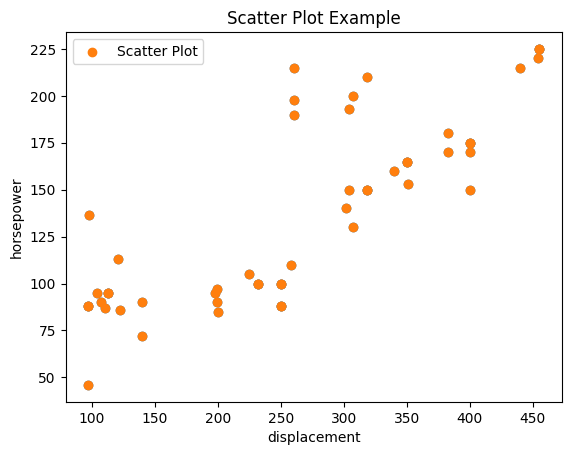

In [108]:



plt.scatter(X,Y) 
# Creating a scatter plot
plt.scatter(X, Y, label="Scatter Plot")

# Adding labels and title
plt.xlabel('displacement')
plt.ylabel('horsepower')
plt.title('Scatter Plot Example')

# Showing legend
plt.legend()

# Display the plot
plt.show()

In [109]:
X_train=X.iloc[0:40]
Y_train=Y.iloc[0:40]
X_test=X.iloc[40:50]
Y_test=Y.iloc[40:50]


In [110]:
X_train.isnull().sum()

0

In [111]:
X_train

0     307.000000
1     350.000000
2     318.000000
3     304.000000
4     302.000000
5     260.446809
6     454.000000
7     440.000000
8     455.000000
9     260.446809
10    383.000000
11    340.000000
12    400.000000
13    455.000000
14    113.000000
15    198.000000
16    199.000000
17    200.000000
18     97.000000
19     97.000000
20    110.000000
21    107.000000
22    104.000000
23    121.000000
24    199.000000
25    260.446809
26    307.000000
27    318.000000
28    304.000000
29     97.000000
30    140.000000
31    113.000000
32     98.000000
33    232.000000
34    225.000000
35    250.000000
36    250.000000
37    232.000000
38    350.000000
39    400.000000
Name: displacement, dtype: float64

In [112]:
Y_train

0     130.000000
1     165.000000
2     150.000000
3     150.000000
4     140.000000
5     198.000000
6     220.000000
7     215.000000
8     225.000000
9     190.000000
10    170.000000
11    160.000000
12    150.000000
13    225.000000
14     95.000000
15     95.000000
16     97.000000
17     85.000000
18     88.000000
19     46.000000
20     87.000000
21     90.000000
22     95.000000
23    113.000000
24     90.000000
25    215.000000
26    200.000000
27    210.000000
28    193.000000
29     88.000000
30     90.000000
31     95.000000
32    136.265306
33    100.000000
34    105.000000
35    100.000000
36     88.000000
37    100.000000
38    165.000000
39    175.000000
Name: horsepower, dtype: float64

In [113]:
X_train = X_train.values.reshape(-1, 1)
Y_train = Y_train.values

In [114]:
X_test= X_test.values.reshape(-1, 1)
Y_test = Y_test.values

In [115]:
reg = LinearRegression().fit(X_train,Y_train)

In [116]:
Y_train

array([130.      , 165.      , 150.      , 150.      , 140.      ,
       198.      , 220.      , 215.      , 225.      , 190.      ,
       170.      , 160.      , 150.      , 225.      ,  95.      ,
        95.      ,  97.      ,  85.      ,  88.      ,  46.      ,
        87.      ,  90.      ,  95.      , 113.      ,  90.      ,
       215.      , 200.      , 210.      , 193.      ,  88.      ,
        90.      ,  95.      , 136.265306, 100.      , 105.      ,
       100.      ,  88.      , 100.      , 165.      , 175.      ])

In [117]:
reg.score(X_train, Y_train)

0.6504398615133685

In [142]:
Y_pred=reg.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mean_absolute_error(Y_test, Y_pred)
Y_pred

array([173.04018986, 161.227512  , 184.49490779, 190.58022669,
       190.58022669, 139.74991589,  97.51064354, 136.88623641,
       136.88623641,  91.06736471])

In [143]:
mean_squared_error(Y_test, Y_pred)

652.6146787912909

In [144]:
root_mean_squared_error(Y_test, Y_pred)

25.54632417376893

In [146]:
r2=r2_score(Y_test, Y_pred)
r2

0.5760149951980906

In [148]:
adj=1-(1-r2)*(10-1)/(10-1-1)
adj

0.523016869597852

In [119]:
data_no.isnull().sum()

NameError: name 'data_no' is not defined

In [120]:
data_no


NameError: name 'data_no' is not defined

In [121]:
data_no.info()

NameError: name 'data_no' is not defined

In [122]:
data_new=data_no['horsepower'].fillna(value=999)  #here i have directly change the col nullv with 999

NameError: name 'data_no' is not defined

In [123]:
data_new

NameError: name 'data_new' is not defined

In [124]:
data_no.describe()  #by this we can set the null value to it respective col mean...

NameError: name 'data_no' is not defined

In [125]:
data_new1=data_no['horsepower'].fillna(value=104.524297)

NameError: name 'data_no' is not defined

In [126]:
data_new1=data_no['displacement'].fillna(value=192.393130)

NameError: name 'data_no' is not defined

In [127]:
data_new1=data_no['weight'].fillna(value=2949.053435)

NameError: name 'data_no' is not defined

In [128]:
#data_no=data_no.fillna(value=104.469388)

In [129]:
data_new1    # how to append all value once

NameError: name 'data_new1' is not defined

In [130]:
data_new2=data_no.fillna(value=192.393130)

NameError: name 'data_no' is not defined

In [131]:
data_new2

NameError: name 'data_new2' is not defined

In [132]:
data_new2.isnull().sum()

NameError: name 'data_new2' is not defined

# using imputer

In [133]:
data_new3 = data_no.iloc[:15,:]

NameError: name 'data_no' is not defined

In [134]:
X=['mpg']
Y=['cylinders']
X

['mpg']

In [135]:
data_new3[X]
plt.scatter(X,Y) 

NameError: name 'data_new3' is not defined

In [136]:
from sklearn.impute import SimpleImputer
import numpy as np

In [137]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [138]:
car_NaN_handle = imputer.fit_transform(X)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'mpg'

In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [64]:
#data_no=pd.read_csv('Automobile.csv')
#df = pd.DataFrame()
d = pd.read_csv("Automobile.csv")

In [65]:
d.isnull().sum()

name            0
mpg             1
cylinders       1
displacement    5
horsepower      7
weight          5
acceleration    2
model_year      2
origin          1
dtype: int64

In [66]:
d.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration
count,397.000000,397.000000,393.000000,391.000000,393.000000,396.000000
mean,23.538539,5.458438,192.393130,104.524297,2949.053435,15.671970
std,7.811191,1.701577,103.205814,38.525101,851.576054,3.961926
min,9.000000,3.000000,68.000000,46.000000,15.000000,0.500000
25%,17.500000,4.000000,105.000000,75.000000,2220.000000,13.775000
50%,23.000000,4.000000,146.000000,94.000000,2790.000000,15.500000
75%,29.000000,8.000000,260.000000,127.000000,3570.000000,17.225000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,70.000000


In [67]:
X = d.iloc[:,2:4]
Y = d.iloc[:,4:5]

In [68]:
X.isnull().sum()

cylinders       1
displacement    5
dtype: int64

In [69]:
Y.isnull().sum()

horsepower    7
dtype: int64

In [70]:

# Replace null values in the 'cylinders' column with a specific value
X['cylinders'] = X['cylinders'].fillna(value=5.458438)

# Replace null values in the 'displacement' column with a different value
X['displacement'] = X['displacement'].fillna(value=192.393130)

In [71]:
Y=Y.fillna(104.524297)

In [72]:
X.isnull().sum()

cylinders       0
displacement    0
dtype: int64

In [73]:
X.shape

(398, 2)

In [74]:
Y.shape

(398, 1)

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2)

In [85]:
X_test.shape

(160, 2)

In [86]:
Y_train

,horsepower
111,90.000000
301,70.000000
389,112.000000
54,69.000000
4,140.000000
...,...
299,71.000000
22,95.000000
72,150.000000
15,95.000000


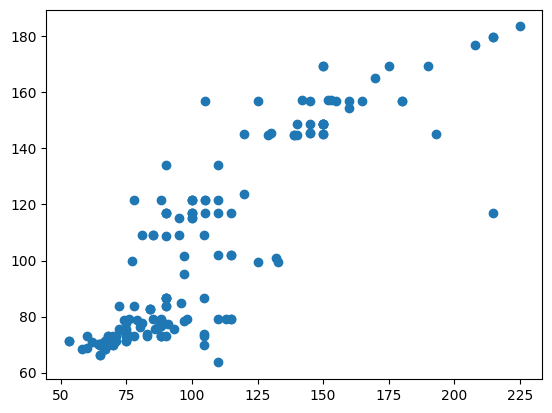

In [94]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
Y_pred
plt.scatter(Y_test,Y_pred)

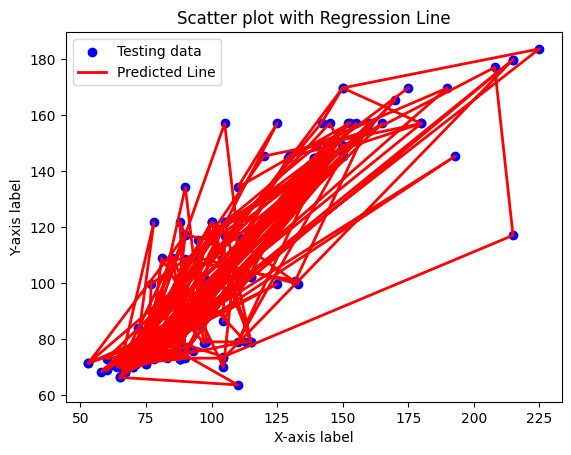

In [97]:
# Plotting the scatter plot
plt.scatter(Y_test, Y_pred, color='blue', label='Testing data')

# Plotting the regression line with predicted values
plt.plot(Y_test, Y_pred, color='red', linewidth=2, label='Predicted Line')

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter plot with Regression Line')

plt.legend()

plt.show()


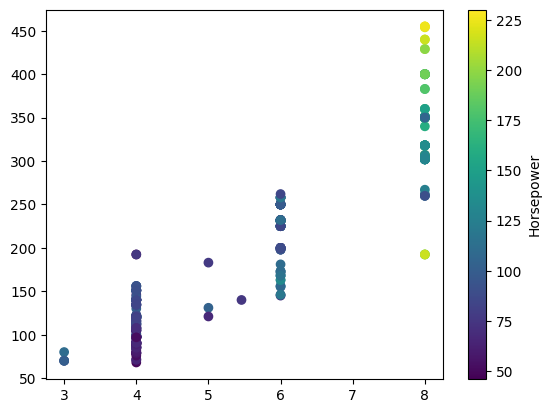

In [103]:
plt.scatter(df['cylinders'], df['displacement'], c=df['horsepower'], cmap='viridis', marker='o')
plt.colorbar(label='Horsepower')


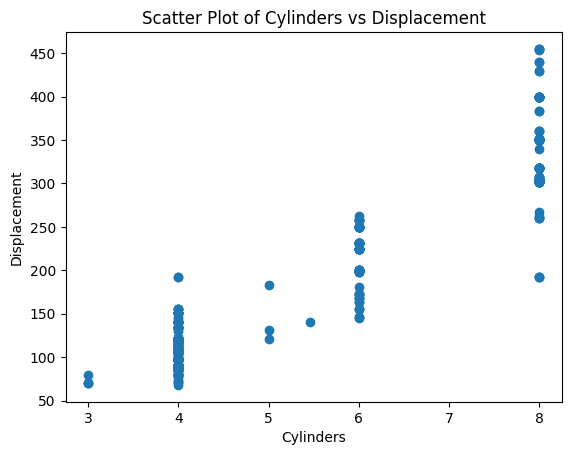

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X is your DataFrame with columns 'cylinder' and 'displacement' and null values replaced

# Scatter plot
plt.scatter(X['cylinders'], X['displacement'])
plt.xlabel('Cylinders')
plt.ylabel('Displacement')
plt.title('Scatter Plot of Cylinders vs Displacement')
plt.show()


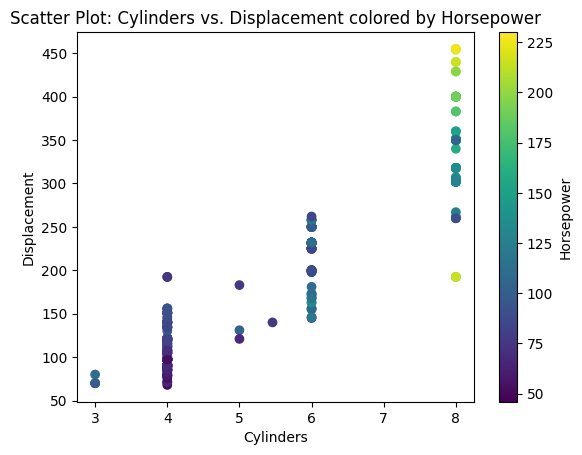

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X and Y are your DataFrames with the specified columns
# Replace null values in X
# X['cylinders'] = X['cylinders'].fillna(value=some_value_for_nulls_in_cylinder)
# X['displacement'] = X['displacement'].fillna(value=some_value_for_nulls_in_displacement)

# Combine X and Y into a single DataFrame
df = pd.concat([X, Y], axis=1)

# Plotting a scatter plot
plt.scatter(df['cylinders'], df['displacement'], c=df['horsepower'], cmap='viridis', marker='o')
plt.xlabel('Cylinders')
plt.ylabel('Displacement')
plt.title('Scatter Plot: Cylinders vs. Displacement colored by Horsepower')
plt.colorbar(label='Horsepower')
plt.show()


R-squared (R2) score: 0.6622328701192026


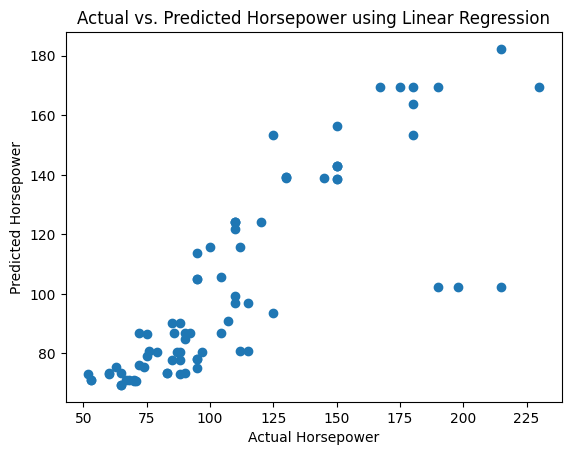

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming X and Y are your DataFrames with the specified columns
# # Replace null values in X
# X['cylinders'] = X['cylinders'].fillna(value=some_value_for_nulls_in_cylinder)
# X['displacement'] = X['displacement'].fillna(value=some_value_for_nulls_in_displacement)
# Y = Y.fillna(value=some_value_for_nulls_in_Y)

# Combine X and Y into a single DataFrame
# df = pd.concat([X, Y], axis=1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Predict the values on the test set
Y_pred = model.predict(X_test)

# Calculate the R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print(f'R-squared (R2) score: {r2}')

# Plotting the actual vs. predicted values
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Horsepower')
plt.ylabel('Predicted Horsepower')
plt.title('Actual vs. Predicted Horsepower using Linear Regression')
plt.show()


In [107]:
df = pd.concat([X, Y], axis=1)


In [108]:
df

,cylinders,displacement,horsepower
0,8.0,307.0,130.0
1,8.0,350.0,165.0
2,8.0,318.0,150.0
3,8.0,304.0,150.0
4,8.0,302.0,140.0
...,...,...,...
393,4.0,140.0,86.0
394,4.0,97.0,52.0
395,4.0,135.0,84.0
396,4.0,120.0,79.0


In [110]:
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame with multiple independent variables and one dependent variable
sns.pairplot(df, x_vars=['independent_var1', 'independent_var2', 'independent_var3'], y_vars='dependent_var', kind='scatter')
plt.show()


ModuleNotFoundError: No module named 'seaborn'